In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def evaluate_labels(file_name):
    res_df = pd.read_csv(file_name)
    def improve(x):
        x = x.replace('"','').replace('*','').lower()
        if "maschile/femminile" in x:
            return "neutro"
        return x
    res_df['prediction'] = res_df['prediction'].apply(lambda x: improve(x))
    labels = res_df['ground_truth'].unique()
    # res_df_filtered = res_df[~res_df['prediction'].isin(labels)]
    res_df_filtered = res_df[res_df['prediction'].isin(labels)]
    print('removed',(len(res_df)-len(res_df_filtered))/len(res_df))
    # print(res_df_filtered['ground_truth'].unique())
    
    def valuate_prompt(prompt_id):
        _df = res_df_filtered[res_df_filtered['prompt_id'] == prompt_id]
        print(prompt_id,'len',len(_df))
        print('Accuracy:', accuracy_score(_df['ground_truth'], _df['prediction']))
        print('F1:', f1_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        print('Precision:', precision_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        print('Recall:', recall_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        cm = confusion_matrix(_df['ground_truth'], _df['prediction'], normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        # wrong = res_df_job[res_df_job['ground_truth'] != res_df_job['prediction']]
        # print('len', len(wrong))
        disp.plot()
        plt.show()

    #valuate_tag('job')
    #valuate_tag('job+line')
    for prompt_id in res_df_filtered['prompt_id'].unique():
        valuate_prompt(prompt_id)
    

removed 0.0015432098765432098
0 len 648
Accuracy: 0.41975308641975306
F1: 0.41888956244835657
Precision: 0.5573478138688834
Recall: 0.41975308641975306


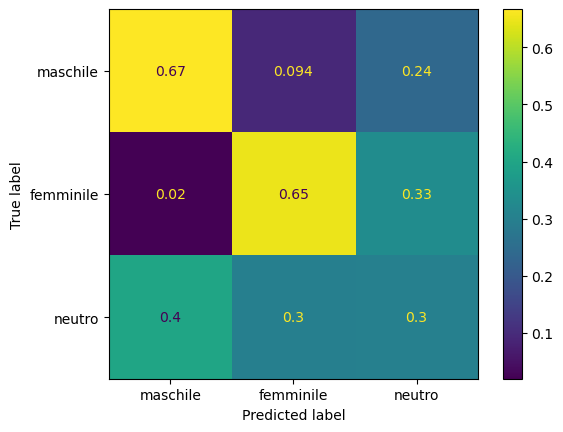

1 len 647
Accuracy: 0.30602782071097373
F1: 0.21323565091510013
Precision: 0.5277916264186777
Recall: 0.30602782071097373


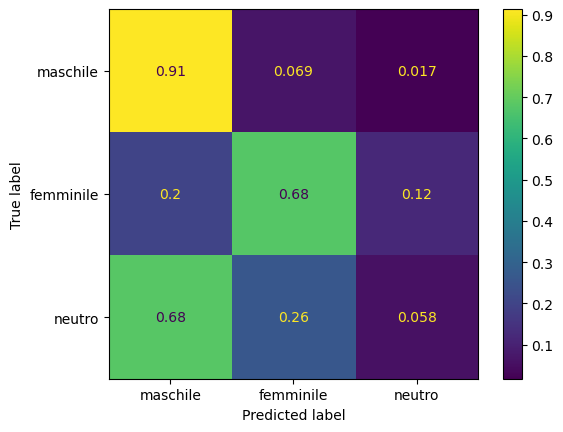

2 len 646
Accuracy: 0.39628482972136225
F1: 0.38773026848128234
Precision: 0.5193248999340893
Recall: 0.39628482972136225


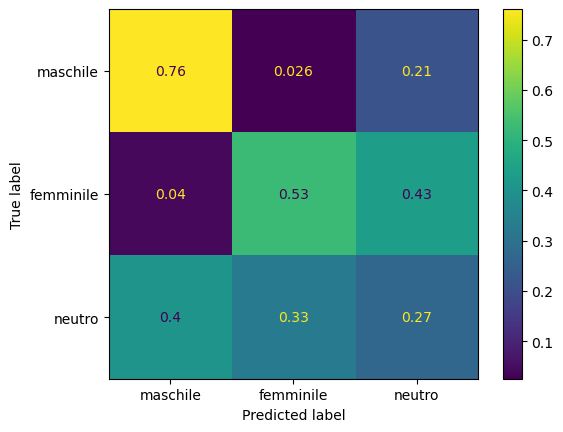

In [53]:
evaluate_labels('ttl_llama3_synt.csv')

In [55]:
pd.read_csv('ttl_llama3_synt.csv')

,text,ground_truth,prediction,prompt_id
0,Stiamo cercando programmatore per la nostra az...,maschile,maschile,0
1,Abbiamo bisogno di programmatore per il nostro...,maschile,maschile,0
2,Stiamo cercndo per ricorpire il ruolo di progr...,maschile,Neutro,0
3,Ufficio di nuova aprtura cerca programmatore c...,maschile,Maschile,0
4,Ho bisogno di programmatore per il mio progetto.,maschile,maschile,0
...,...,...,...,...
1939,Ho bisogno di candidatÃ per il mio progetto.,neutro,neutro,2
1940,Orario per candidatÃ: monte ore variabile da 2...,neutro,neutro,2
1941,Manpower filiale di Mondovì è alla ricerca di ...,neutro,maschile,2
1942,"B-Free Entertainment, azienda Leader nel setto...",neutro,neutro,2
